# Scientific Computing Tools and Visualization
## Lecture 2

We will discuss how the Julia programming language is used for scientific computing and data visualization.

Readings:
* [Julia tutorial](https://learnxinyminutes.com/docs/julia/)
* [Plots.jl tutorial (with PlotlyJS backed)](https://juliaplots.github.io/examples/plotlyjs/)

# Scientific Computing

Scientific computing is the process of using "advanced computing capabilities to understand and solve complex problems" [[1](https://en.wikipedia.org/wiki/Computational_science)].

Scientific computing includes:

* Algorithm and data structure design
* Numerical simulation
* Model fitting
* Data analysis
* Optimization

# Julia

<img src="figures/julia.png" alt="Julia" width="400" align="middle">

Julia is a high-level dynamic programming language [[2](https://en.wikipedia.org/wiki/Julia_(programming_language))] that was designed to solve the two-language problem.

__Two language problem__: One typically uses a high-level language like Matlab to do scientific computing and create prototypes, but a low-level language like C to implement resulting solutions.

Julia is both fast and easy to prototype in, and supports a wide range of features such as a built in package manager (so reproducing someone's exact development environment can be done for verification purposes), distributed computing, C and Python interfaces, a powerful REPL, and an elegant type system.

## Installing Packages

Julia makes it easy to install packages. (And specific versions of packages)

In [ ]:
Pkg.add("Plots")

In [ ]:
Pkg.update()

Julia makes it easy to obtain packages from GitHub

In [ ]:
Pkg.clone("https://github.com/sisl/AA120Q.git")

## Scientific Computing Packages

Julia offers a wide range of [official packages](http://pkg.julialang.org/). There are many custom packages that are not in the official listing as well.

You can go to a package's documentation, typically from GitHub, to view all of its features.

Some of the packages we will be using are:

### DataFrames
This package provides an Excel-table-like type for data processing.

In [2]:
using DataFrames
df = DataFrame(animal=["Dog", "Cat", "Mouse", "Snake", "Sparrow"], legs=[4,4,4,0,2], weight=[100.0, 10.0, 0.68, 2.0, 0.2])

,animal,legs,weight
1,Dog,4,100.0
2,Cat,4,10.0
3,Mouse,4,0.68
4,Snake,0,2.0
5,Sparrow,2,0.2


In [3]:
df[2, :animal]

"Cat"

In [4]:
df[2, 1]

"Cat"

In [5]:
df[:legs]

5-element DataArrays.DataArray{Int64,1}:
 4
 4
 4
 0
 2

### Distributions
This package provides all sorts of probability distributions and methods for sampling from them and inferring them from data.

In [7]:
using Distributions
srand(0)
N = Normal(1.0, 2.0)

Distributions.Normal{Float64}(μ=1.0, σ=2.0)

In [8]:
rand(N)

2.3582148520715553

In [9]:
data = rand(N, 10)

10-element Array{Float64,1}:
  2.65683  
  0.293985 
  0.730292 
  2.17323  
  1.59467  
  1.1299   
  0.781965 
 -0.0284208
  4.14866  
 -0.377814 

In [10]:
fit(Normal, data)

Distributions.Normal{Float64}(μ=1.3103295966192077, σ=1.3045243823987742)

### Discretizers
This package provides an easy way to discretize data or map between labels and integer values.

In [12]:
using Discretizers
data = ["cat", "dog", "dog", "cat", "cat", "elephant"]
catdisc = CategoricalDiscretizer(data);

In [13]:
println("cat becomes:  ", encode(catdisc, "cat"))
println("dog becomes:  ", encode(catdisc, "dog"))
println("data becomes: ", encode(catdisc, data))

cat becomes:  1
dog becomes:  2
data becomes: [1,2,2,1,1,3]


In [14]:
println("1 becomes: ", decode(catdisc, 1))
println("2 becomes: ", decode(catdisc, 2))
println("[1,2,3] becomes: ", decode(catdisc, [1,2,3]))

1 becomes: cat
2 becomes: dog
[1,2,3] becomes: ASCIIString["cat","dog","elephant"]


Here we construct a linear discretizer that maps $[0,0.5)\rightarrow 1$ and $[0.5,1]\rightarrow2$

In [15]:
bin_edges = [0.0,0.5,1.0]
lindisc = LinearDiscretizer(bin_edges);

In [16]:
println("0.2 becomes: ", encode(lindisc, 0.2))
println("0.7 becomes: ", encode(lindisc, 0.7))
println("0.5 becomes: ", encode(lindisc, 0.5))
println("it works on arrays: ", encode(lindisc, [0.0,0.8,0.2]))

0.2 becomes: 1
0.7 becomes: 2
0.5 becomes: 2
it works on arrays: [1,2,1]


In [17]:
println("1 becomes: ", decode(lindisc, 1))
println("2 becomes: ", decode(lindisc, 2))
println("it works on arrays: ", decode(lindisc, [2,1,2]))

1 becomes: 0.2696446420713091
2 becomes: 0.6300179251345239
it works on arrays: [0.9550232706755055,0.08351809722107484,0.8277242063499562]


### BayesNets
This package provides a Bayesian Network type and associated algorithms to Julia.

In [19]:
using BayesNets

bn = BayesNet()
push!(bn, StaticCPD(:a, Normal(1.0)))
push!(bn, LinearGaussianCPD(:b, [:a], [2.0], 3.0, 1.0))

In [20]:
pdf(bn, :a=>0.5, :b=>2.0) # evaluate the probability density

0.01900834726778591

In [21]:
rand(bn)

Dict{Symbol,Any} with 2 entries:
  :a => -0.6072563241277753
  :b => -0.6953053789154908

In [22]:
rand(bn, 5) # produces a DataFrame

,a,b
1,0.8828624692670648,4.164471344348746
2,2.1422764389413196,7.195936559682166
3,1.2794662520898985,5.670354182271314
4,0.6421164853296757,4.757947292808683
5,1.3002339290239697,4.8377907983805155


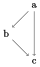

In [23]:
data = DataFrame(c=[1,1,1,1,2,2,2,2,3,3,3,3], 
                 b=[1,1,1,2,2,2,2,1,1,2,1,1],
                 a=[1,1,1,2,1,1,2,1,1,2,1,1])

fit(DiscreteBayesNet, data, (:a=>:b, :a=>:c, :b=>:c))

# Data Visualization & Plotting

Data visualization and plotting are extremely important for the interpretation of scientific results. Julia has many great packages for this.

## Plots
The Plots.jl package is a wrapper for a number of Julia plotting packages, providing one clean interface to all of them.

In [2]:
using Plots
plotlyjs() # the plotlyjs backend is great for use in Julia notebooks (PGFPlots is great for papers)
plot(Plots.fakedata(50,5),w=3)

Plotting $f(x)$

In [3]:
plot(sin,(x->sin(2x)), 0, 2π, line=4, leg=false)

Plotting x and y arrays

In [4]:
x = [1,2,3,4,5,8,10]
y = [0.5,0.4,0.8,1.2,-0.5,1.1,0.0]
plot(x,y, xlab="horizontal axis label", ylab="vertical axis label", lab="line label", title="the title")

Layer plots on top of one another

In [5]:
p = plot(x->sin(x^2), 0, π, line=2, lab="sin(x^2)")
plot!(p, x->sin(x)^2, 0, π, line=2, lab="sin(x)^2")
scatter!(p, [0.0, 1.0, 2.0, 3.0], [0.5, 0.0, -0.5, 0.0], lab="scatter")

In [6]:
histogram(randn(1000),nbins=20)

In [7]:
histogram2d(randn(10000),randn(10000),nbins=20)

Use layouts to put multiple plots in the same figure

In [8]:
p1 = histogram(randn(1000),nbins=20)
p2 = plot(x->sin(x^2), 0, π, line=2, lab="sin(x^2)")
plot(p1, p2, layout=2, size=(950, 400))

### Data Visualization

Data visualization is more general than plotting, and often involves interaction and more general graphics libraries.

This class uses Reactive, Interact, and Cairo behind the scenes.

In [10]:
using Interact
using Colors

@manipulate for r in linspace(0,1), g in linspace(0,1), b in linspace(0,1)
    RGB(r, g, b)
end

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"r",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"g",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"b",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

In [12]:
@manipulate for h in linspace(0,360), s in linspace(0,1), v in linspace(0,1)
    HSV(h, s, v)
end

Interact.Slider{Float64}(Signal{Float64}(176.3265306122449, nactions=0),"h",176.3265306122449,linspace(0.0,360.0,50),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"s",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"v",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

In [14]:
plot(x->sin(x^2), 0, π, line=2, color=RGB(0.75, 0.0, 0.5))

We will see examples of Reactive later in the class. Feel free to dig into the class source code to see how Cairo works.

The CrossfilterCharts module gives you interactive filtered charts for DataFrames.

In [18]:
using CrossfilterCharts
using RDatasets
iris = dataset("datasets", "iris")
iris[1:5, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [19]:
using CrossfilterCharts
dc(iris)

CrossfilterCharts.DCOut(150×5 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species     │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ "setosa"    │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ "setosa"    │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ "setosa"    │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ "setosa"    │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ "setosa"    │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ "setosa"    │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ "setosa"    │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ "setosa"    │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ "setosa"    │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ "setosa"    │
│ 11  │ 5.4         │ 3.7        │ 1.5         │ 0.2        │ "setosa"    │
⋮
│ 139 │ 6.0         │ 3.0        │ 4.8         │ 1.8        │ "virginica" │
│ 140 │ 6.9         │ 3.1        │ 5.4         │ 2.1        │ "virginica" │
│ 141 │ 6.7         │ 3.1        │ 5.6         │ 2.4        │ "virginica" │
│ 142 │ 6.9         │ 3.1        │ 5.1         │ 2.3        │ "virginica" │
│ 143 │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ "virginica" │
│ 144 │ 6.8         │ 3.2        │ 5.9         │ 2.3        │ "virginica" │
│ 145 │ 6.7         │ 3.3        │ 5.7         │ 2.5        │ "virginica" │
│ 146 │ 6.7         │ 3.0        │ 5.2         │ 2.3        │ "virginica" │
│ 147 │ 6.3         │ 2.5        │ 5.0         │ 1.9        │ "virginica" │
│ 148 │ 6.5         │ 3.0        │ 5.2         │ 2.0        │ "virginica" │
│ 149 │ 6.2         │ 3.4        │ 5.4         │ 2.3        │ "virginica" │
│ 150 │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ "virginica" │,[CrossfilterCharts.Dimension(:SepalLength,"function(d){return Math.round(d.SepalLength / 0.500000)*0.500000; }",0.5),CrossfilterCharts.Dimension(:SepalWidth,"function(d){return Math.round(d.SepalWidth / 0.100000)*0.100000; }",0.1),CrossfilterCharts.Dimension(:PetalLength,"function(d){return Math.round(d.PetalLength / 0.500000)*0.500000; }",0.5),CrossfilterCharts.Dimension(:PetalWidth,"function(d){return Math.round(d.PetalWidth / 0.100000)*0.100000; }",0.1),CrossfilterCharts.Dimension(:Species,"function(d){return d.Species; }",NaN)],[CrossfilterCharts.Group(CrossfilterCharts.Dimension(:SepalLength,"function(d){return Math.round(d.SepalLength / 0.500000)*0.500000; }",0.5),"SepalLength_sum","reduceSum(function(d){ return d.SepalLength; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:SepalWidth,"function(d){return Math.round(d.SepalWidth / 0.100000)*0.100000; }",0.1),"SepalWidth_sum","reduceSum(function(d){ return d.SepalWidth; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:PetalLength,"function(d){return Math.round(d.PetalLength / 0.500000)*0.500000; }",0.5),"PetalLength_sum","reduceSum(function(d){ return d.PetalLength; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:PetalWidth,"function(d){return Math.round(d.PetalWidth / 0.100000)*0.100000; }",0.1),"PetalWidth_sum","reduceSum(function(d){ return d.PetalWidth; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:Species,"function(d){return d.Species; }",NaN),"Species_count","reduceCount()")],[CrossfilterCharts.DCChart(CrossfilterCharts.Group(CrossfilterCharts.Dimension(:SepalLength,"function(d){return Math.round(d.SepalLength / 0.500000)*0.500000; }",0.5),"SepalLength_sum","reduceSum(function(d){ return d.SepalLength; })"),CrossfilterCharts.ChartType("barChart",[CrossfilterCharts.Attribute(:centerBar,"true"),CrossfilterCharts.Attribute(:gap,"")],[CrossfilterCharts.ChartType("NONE",[CrossfilterCharts.Attribute(:zoomScale,""),CrossfilterCharts.Attribute(:zoomOutRestrict,""),CrossfilterCharts.Attribute(:mouseZoomable,""),Crossfilt

## SymPy

Symbolic math in Julia!

In [21]:
using SymPy
x = symbols("x")

x

In [22]:
y = sin(pi*x)

sin(pi*x)

In [23]:
y(1)

0

In [24]:
solve(x^2 + 1)

2-element Array{SymPy.Sym,1}
[-I]
[  ]
[I ]

In [25]:
x = symbols("x", real=true)
solve(x^2 + 1)

0-element Array{SymPy.Sym,1}
[]

In [26]:
y1, y2 = symbols("y1, y2", positive=true)
solve(y1 + 1)    # -1 is not positive

0-element Array{SymPy.Sym,1}
[]

In [27]:
ex = x^2 + 2x + 1
subs(ex, x, y)

   2                        
sin (pi*x) + 2*sin(pi*x) + 1

In [28]:
subs(ex, x, 0)

1

In [29]:
p = x^2 + 3x + 2
factor(p)

(x + 1)*(x + 2)

In [30]:
solve(cos(x) - sin(x))

2-element Array{SymPy.Sym,1}
[-3*pi ]
[------]
[  4   ]
[      ]
[  pi  ]
[  --  ]
[  4   ]

In [31]:
limit(sin(x)/x, x, 0)

1

In [32]:
diff(x^x, x)

 x             
x *(log(x) + 1)

In [33]:
integrate(x^3, x)

 4
x 
--
4 

## AA120Q

This is the package we will use for the class.

In [ ]:
Pkg.clone("https://github.com/sisl/AA120Q.git")

# Buffon's Needles Problem

<img src="figures/buffon.png" alt="Tossing Needles" width="600" align="middle">

Buffon's Needle Problem was first proposed by Georges Buffon in 1737. By randomly throwing needles onto a hard floor marked with equally spaced lines, Buffon was able to derive a mathematial expression which could be used to calculate the value of pi. Specifically, the probability that a needle of $b$ overlaps with a line is $\frac{2}{\pi}$. 

One can estimate pi by dropping a large number of pins and using the ratio of overlaps to non-overlaps to estimate pi.
The accuracy of this experimental value of pi increases with an increasing number of random throws. 
See [Wikipedia](https://en.wikipedia.org/wiki/Buffon%27s_needle) for a detailed problem description and background.

# Assignment 1

<img src="figures/buffon.png" alt="Tossing Needles" width="600" align="middle">

Buffon's Needle Problem was first proposed by Georges Buffon in 1737. By randomly throwing needles onto a hard floor marked with equally spaced lines, Buffon was able to derive a mathematial expression which could be used to calculate the value of pi. Specifically, the probability that a needle of $b$ overlaps with a line is $\frac{2}{\pi}$. 

One can estimate pi by dropping a large number of pins and using the ratio of overlaps to non-overlaps to estimate pi.
The accuracy of this experimental value of pi increases with an increasing number of random throws. 
See [Wikipedia](https://en.wikipedia.org/wiki/Buffon%27s_needle) for a detailed problem description and background.

# Buffon's Needles Problem

Your task is to develop an algorithm that estimates pi based on the above description, and write a program to implement this  algorithm.

1.	Your algorithm must be implemented from scratch in Julia.
2.	Your function should have the following signature: `buffon(n::Int)`.
3.  Your function should return $\hat{\pi}$, your estimate for pi.
4.  Plot how your algorithm converges as the sample count is increased using [Plots.jl](https://github.com/tbreloff/Plots.jl)
5.	Although you may discuss your algorithm with others, you must not share code.

In [2]:
function buffon(n::Int)

    # write algorithm here...
    
end

buffon (generic function with 1 method)

Create a convergence plot.
* the x-axis should be the number of samples, log space, from 1 to 10000 samples
* the y-axis should be the estimate of pi
* plot the mean estimate for pi out of 100 trials
* include error bars with 1-standard deviation.

In [20]:
using Plots
plotlyjs()

nsamples = round(Int, collect(logspace(1,5,15)))

# replace this with your own code
fake_mean_y = map(x->pi + 1/x, nsamples)
fake_stdev_y = map(x->0.1/log(x), nsamples)

plot(nsamples, fake_mean_y, yerror=fake_stdev_y, xaxis=("number of samples", :log), ylabel="estimate of pi")